In [1]:
import os
import sys

repo_root_path = os.path.abspath(os.path.join(os.path.pardir, 'hebbnets'))
if repo_root_path not in sys.path:
    sys.path.append(repo_root_path)

import numpy as np
from tqdm import tqdm

from demo_utils import yeild_patch_batch, turn_input_weights_to_pilimg, place_pilimgs_in_grid
from hebbnets.hebbnets.hah_model import MultilayerHahNetwork

# Make image patch generator

In [9]:
image_urls = [
    'https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Forevertron_Panoramic_2.jpg/1280px-Forevertron_Panoramic_2.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Forevertron_Bridge.jpg/800px-Forevertron_Bridge.jpg',
    'https://upload.wikimedia.org/wikipedia/en/thumb/e/ed/Cello_Bird_at_Forevertron%2C_WI.JPG/450px-Cello_Bird_at_Forevertron%2C_WI.JPG',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Loudspeaker_bird.jpg/800px-Loudspeaker_bird.jpg'
]

patch_size = [21, 21]

batch_o_patches_gen = yeild_patch_batch(
    image_urls,
    patch_size=patch_size,
    patch_stride=[3, 3],
    batch_size=1000
)

# Set up HAH network

In [10]:
input_layer_size = patch_size[0] * patch_size[1]
nodes_per_layer = [128]

hah_network = MultilayerHahNetwork(
    input_layer_size,
    nodes_per_layer,
    has_bias=True,
    act_type='linear',
    gamma=0.5
)

# Train network on batches of patches

In [11]:
for batch in tqdm(batch_o_patches_gen):    
    hah_network.train(
        [p.ravel() for p in batch],
        num_epochs=1
    )


201it [02:09,  1.60it/s]


# Visualize the learned recpetive fields

In [15]:
rf_picture = place_pilimgs_in_grid(
    turn_input_weights_to_pilimg(hah_network.layers[0], patch_size)
)

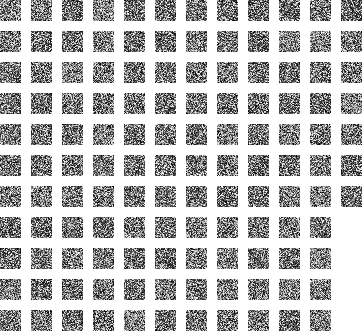

In [16]:
rf_picture